# Code alongs - MLP - Multilayered perceptron

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets.mnist import load_data

# from tensorflows documentation
# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data
(x_train, y_train), (x_test, y_test) = load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


7

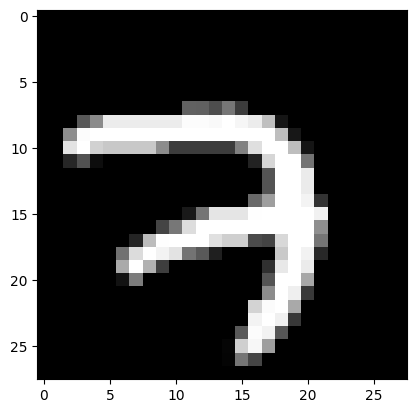

In [14]:
plt.imshow(x_train[5000], cmap="gray")
y_train[5000]

In [8]:
# 2D image for index 5000 - it contains 28x28
x_train[5000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [13]:
x_train[5000].shape

(28, 28)

In [10]:
# pixel intensity between 0 and 254 for image 5000
x_train[5000].min(), x_train[5000].max()

(0, 254)

In [12]:
# pixel value at row 10, col 5 for image 5000
x_train[5000, 10, 5]

199

In [15]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [18]:
y_train.shape, y_train.min(), y_train.max()

((60000,), 0, 9)

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

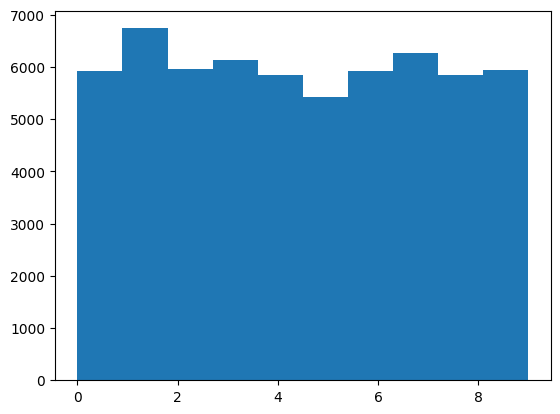

In [19]:
plt.hist(y_train)

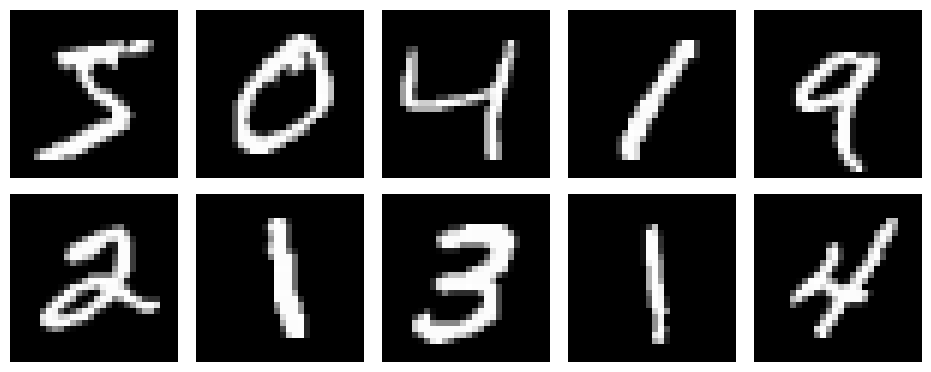

In [24]:
def display_images(data, n_rows = 2, n_cols = 5, figsize=(12,4)):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i], cmap="gray")
        ax.axis("off")

    fig.subplots_adjust(wspace=0, hspace=0.1, bottom=0)
    
display_images(x_train)

(10, 28, 28)

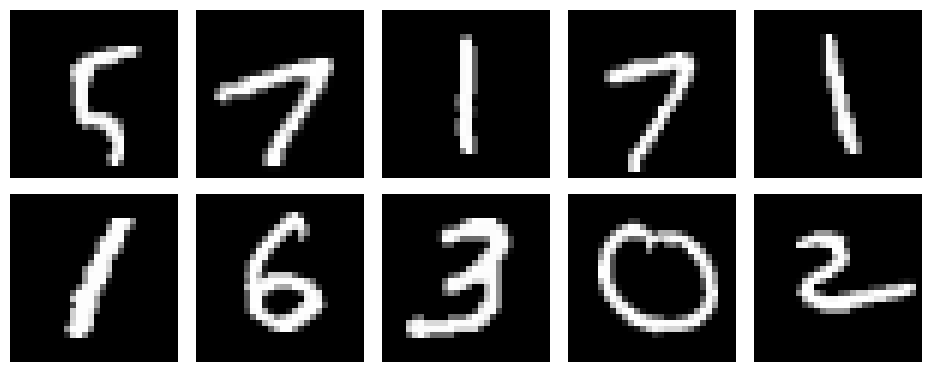

In [26]:
display_images(x_train[100:110])
x_train[100:110].shape

## Normalize data

In [30]:
# Could also use min/max scaler from scikit learn
X_train = x_train.astype("float32")/255
X_test = x_test.astype("float32")/255

X_train.min(), X_train.max()

(0.0, 1.0)

In [33]:
X_train[5000].reshape(-1).shape

(784,)

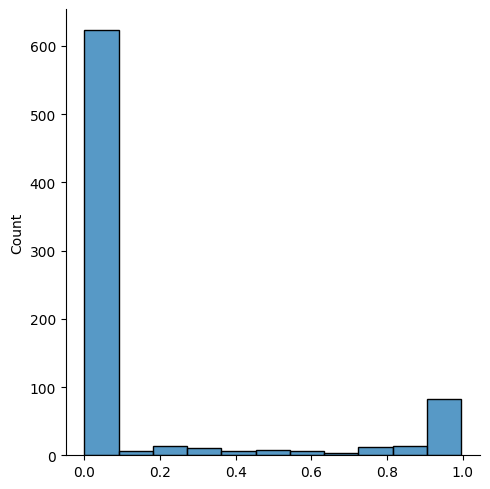

In [34]:
import seaborn as sns

sns.displot(data = X_train[5000].reshape(-1), kind="hist")

## MLP model

- 10 output neurons/nodes (which represents 0,1,2,3,...,9, our classes)
- softmax activation function in output layer -> probabilities
- 784 neurons for input layer (28x28) -> use Flatten layer
- hidden layers -> Dense

In [41]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense


def mlp_model(neurons: tuple|list = None, names: tuple|list = None, activations: tuple|list = []):
    model = Sequential(name="MLP_model")
    model.add(Flatten(input_shape=(28, 28), name="Input_layer"))

    # hidden layers + output
    for neuron, name, activation in zip(neurons, names, activations):
        model.add(Dense(neuron, name=name, activation=activation))

    model.compile(
        loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
    )

    return model

# naive because we don't have any hidden layers
model_naive = mlp_model(neurons=[10], names=["Output_layer"], activations=["softmax"])
model_naive.summary()

c:\Users\Erik\Documents\github\AI-Erik-Johansson-OPA23\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "MLP_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (Flatten)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model_naive.fit(X_train, y_train, validation_split=1/6, epochs=20, verbose=1)

Epoch 1/20


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9233 - loss: 0.2703 - val_accuracy: 0.9286 - val_loss: 0.2567
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9263 - loss: 0.2637 - val_accuracy: 0.9298 - val_loss: 0.2612
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9289 - loss: 0.2557 - val_accuracy: 0.9302 - val_loss: 0.2561
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9301 - loss: 0.2542 - val_accuracy: 0.9310 - val_loss: 0.2520
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9313 - loss: 0.2475 - val_accuracy: 0.9304 - val_loss: 0.2554
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9313 - loss: 0.2471 - val_accuracy: 0.9310 - val_loss: 0.2522
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9307 - loss: 0.2464 - val_accuracy: 0.9314 - val_loss: 0.2547
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9305 - loss: 0.2491 - val_accurac

In [44]:
import pandas as pd

naive_history = pd.DataFrame(model_naive.history.history)
naive_history.head()

,accuracy,loss,val_accuracy,val_loss
0,0.92390,0.269380,0.9286,0.256670
1,0.92594,0.264833,0.9298,0.261167
2,0.92688,0.261578,0.9302,0.256111
3,0.92790,0.258187,0.9310,0.251997
4,0.92848,0.256049,0.9304,0.255441


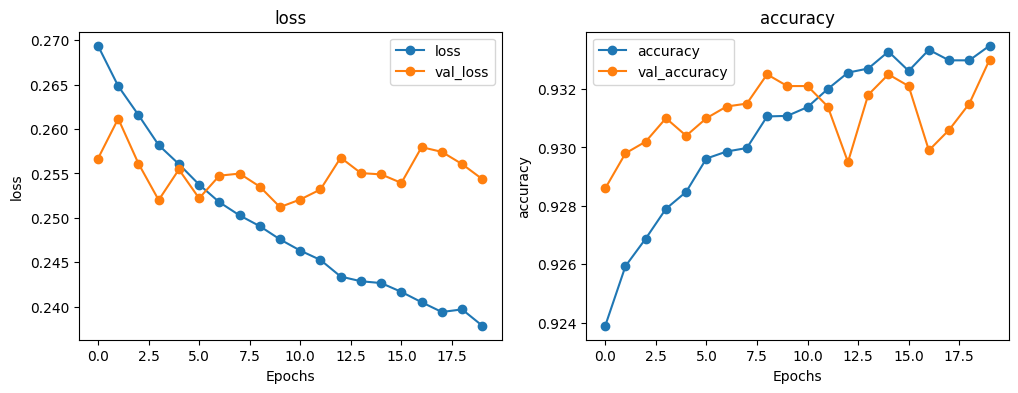

In [46]:
def plot_metrics(df_history, style="-o"):
    _, axes = plt.subplots(1, 2, figsize=(12, 4))
    metrics = [["loss", "val_loss"], ["accuracy", "val_accuracy"]]
    for ax, metric in zip(axes, metrics):
        df_history.plot(
            y=metric,
            xlabel="Epochs",
            ylabel=metric[0],
            title=metric[0],
            ax=ax,
            style=style,
        )

plot_metrics(naive_history)

## Add hidden layers

In [48]:
model_deep = mlp_model(
    neurons=[128, 128, 10],
    activations=["relu", "relu", "softmax"],
    names=["Hidden_1", "Hidden_2", "Output"],
)

model_deep.summary()

Model: "MLP_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (Flatten)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_1 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_2 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
model_deep.fit(X_train, y_train, validation_split=1/6, epochs=20, verbose=1)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8726 - loss: 0.4423 - val_accuracy: 0.9589 - val_loss: 0.1387
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9649 - loss: 0.1114 - val_accuracy: 0.9726 - val_loss: 0.0971
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9782 - loss: 0.0674 - val_accuracy: 0.9717 - val_loss: 0.0955
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9830 - loss: 0.0523 - val_accuracy: 0.9755 - val_loss: 0.0881
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9864 - loss: 0.0411 - val_accuracy: 0.9733 - val_loss: 0.1028
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9890 - loss: 0.0337 - val_accuracy: 0.9726 - val_loss: 0.1076
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9920 - loss: 0.0254 - val_accuracy: 0.9741 - val_loss: 0.1041
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9918 - loss: 0.0233 - 

In [50]:
deep_history = pd.DataFrame(model_deep.history.history)
deep_history.head()

,accuracy,loss,val_accuracy,val_loss
0,0.92616,0.250512,0.9589,0.138707
1,0.96668,0.106184,0.9726,0.097131
2,0.97702,0.071999,0.9717,0.095491
3,0.98242,0.054581,0.9755,0.088115
4,0.98600,0.043546,0.9733,0.102795


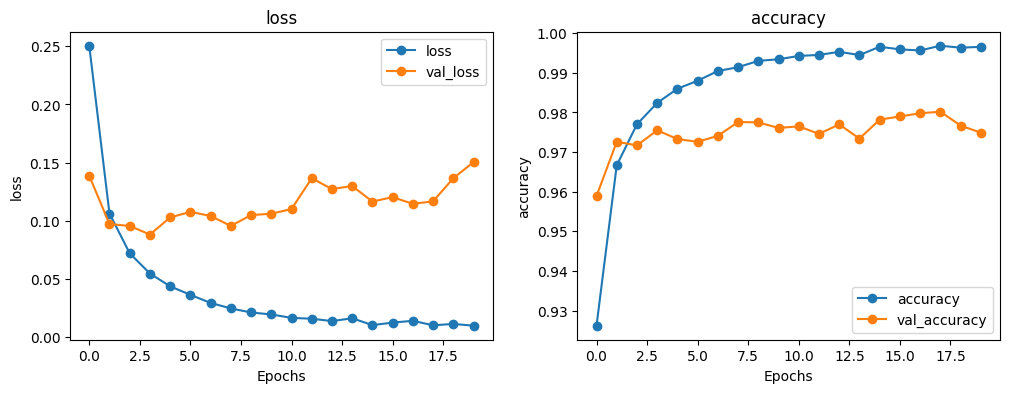

In [51]:
plot_metrics(deep_history)

In [53]:
# trains on all training data (60000)
model_deep.fit(X_train, y_train, epochs=3, verbose=1)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9912 - loss: 0.0397
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9963 - loss: 0.0120
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9966 - loss: 0.0101


## Prediction and evaluation

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model_deep.predict(X_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[7.69440971e-16, 8.83002352e-11, 4.15053436e-10, ...,
        9.99990106e-01, 1.57637133e-11, 1.55210159e-06],
       [1.53843102e-23, 3.16318948e-15, 1.00000000e+00, ...,
        8.19510814e-25, 1.14973905e-21, 1.71480117e-34],
       [2.14653795e-10, 9.99998689e-01, 6.12568307e-09, ...,
        2.18541530e-07, 9.43665100e-07, 3.50199064e-10],
       ...,
       [7.14233924e-25, 7.22284052e-17, 1.38267447e-24, ...,
        7.38542596e-14, 1.35352623e-12, 5.86481037e-12],
       [5.08374244e-18, 1.46468406e-19, 1.06821445e-19, ...,
        6.46873874e-16, 4.53716613e-11, 7.62312954e-19],
       [8.51140549e-15, 1.44371440e-28, 3.79377554e-17, ...,
        6.16933572e-31, 2.70631742e-18, 1.74373977e-19]], dtype=float32)

In [56]:
y_pred[1]

array([1.5384310e-23, 3.1631895e-15, 1.0000000e+00, 3.6486812e-21,
       4.4781601e-34, 2.9853282e-27, 2.6667237e-22, 8.1951081e-25,
       1.1497390e-21, 1.7148012e-34], dtype=float32)

In [57]:
y_test[1]

2

In [59]:
y_pred.shape

(10000, 10)

In [61]:
y_pred = np.argmax(y_pred, axis=1)
y_pred.shape

(10000,)

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.99      0.96      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



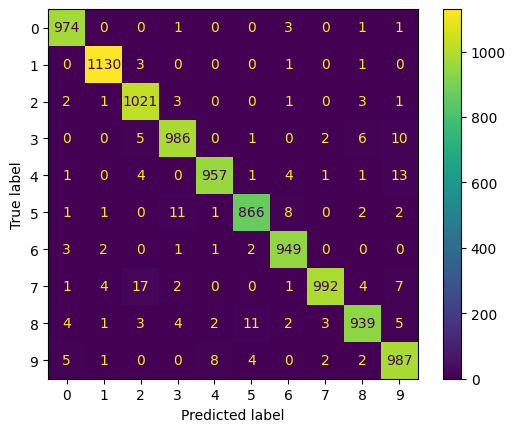

In [64]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

## Some misclassifications

In [66]:
(y_pred != y_test).sum()

199

In [68]:
misclassified_indices = np.where(y_pred != y_test)[0]
misclassified_indices[:10]

array([ 18, 104, 115, 151, 247, 340, 432, 445, 495, 578], dtype=int64)

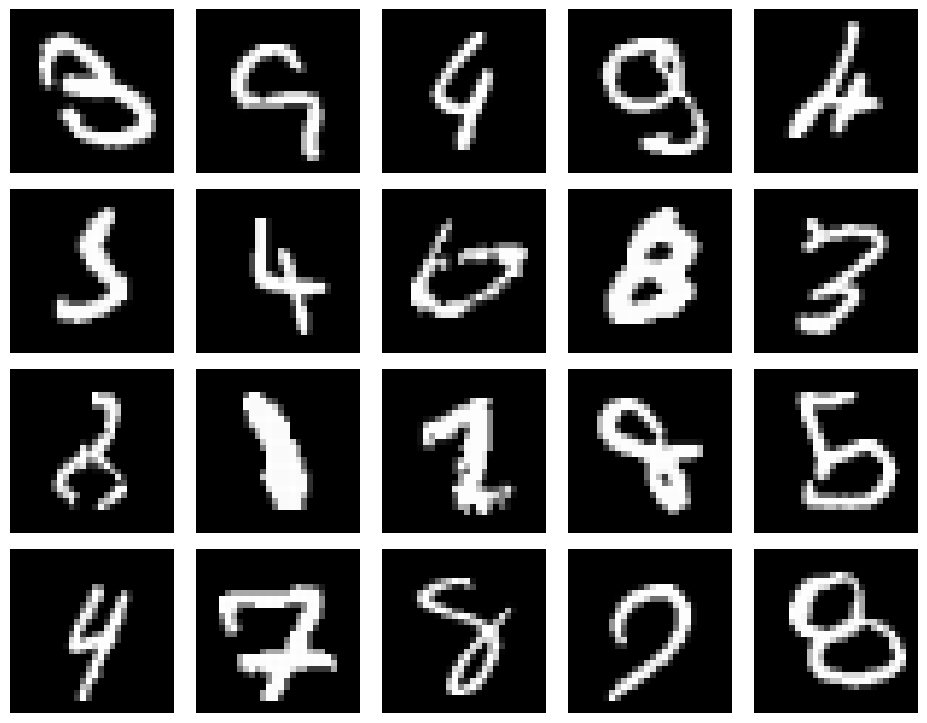

In [69]:
display_images(X_test[misclassified_indices], 4, 5, (12, 8))